<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Фреймворк-ICE" data-toc-modified-id="Фреймворк-ICE-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Фреймворк ICE</a></span></li><li><span><a href="#Фреймворк-RICE" data-toc-modified-id="Фреймворк-RICE-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Фреймворк RICE</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#График-кумулятивной-выручки-по-группам" data-toc-modified-id="График-кумулятивной-выручки-по-группам-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>График кумулятивной выручки по группам</a></span></li><li><span><a href="#График-кумулятивного-среднего-чека" data-toc-modified-id="График-кумулятивного-среднего-чека-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>График кумулятивного среднего чека</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивного-среднего-чека" data-toc-modified-id="График-относительного-изменения-кумулятивного-среднего-чека-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>График относительного изменения кумулятивного среднего чека</a></span></li><li><span><a href="#График-кумулятивной-конверсии-по-группам" data-toc-modified-id="График-кумулятивной-конверсии-по-группам-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>График кумулятивной конверсии по группам</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивной-конверсии" data-toc-modified-id="График-относительного-изменения-кумулятивной-конверсии-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>График относительного изменения кумулятивной конверсии</a></span></li><li><span><a href="#Точечный-график-количества-заказов-по-пользователям" data-toc-modified-id="Точечный-график-количества-заказов-по-пользователям-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Точечный график количества заказов по пользователям</a></span></li><li><span><a href="#Точечный-график-стоимостей-заказов" data-toc-modified-id="Точечный-график-стоимостей-заказов-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Точечный график стоимостей заказов</a></span></li><li><span><a href="#95-й-и-99-й-перцентили-количества-заказов-на-пользователя" data-toc-modified-id="95-й-и-99-й-перцентили-количества-заказов-на-пользователя-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>95-й и 99-й перцентили количества заказов на пользователя</a></span></li><li><span><a href="#95-й-и-99-й-перцентили-стоимости-заказов" data-toc-modified-id="95-й-и-99-й-перцентили-стоимости-заказов-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>95-й и 99-й перцентили стоимости заказов</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-конверсии-(«сырые»-данные)" data-toc-modified-id="Статистическая-значимость-различий-в-конверсии-(«сырые»-данные)-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Статистическая значимость различий в конверсии («сырые» данные)</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-чеке-(«сырые»-данные)" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-чеке-(«сырые»-данные)-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Статистическая значимость различий в среднем чеке («сырые» данные)</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-конверсии-(«очищенные»-данные)" data-toc-modified-id="Статистическая-значимость-различий-в-конверсии-(«очищенные»-данные)-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Статистическая значимость различий в конверсии («очищенные» данные)</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-чеке-(«очищенные»-данные)" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-чеке-(«очищенные»-данные)-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Статистическая значимость различий в среднем чеке («очищенные» данные)</a></span></li></ul></div>

# Проверка гипотез и А/В анализ

Совместно с отделом маркетинга был подготовлен список гипотез для увеличения выручки. 
В текщем исследовании мы приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

# Часть 1. Приоритизация гипотез

In [1]:
#импорт библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
pd.set_option("max_colwidth", -1)

## Подготовка данных

In [2]:
#чтение файла и вывод общей информации
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
# создаем функцию для автоматизации просмотра основных сведений
def information(df):
    return(
    df.info(),
    display('3 cлучайные строки', df.sample(3)),
    display('Процент пропусков', round(df.isna().mean()*100, 1)),
    display('Количество дубликатов', df.duplicated().sum())
    )

In [4]:
# вывод общей информации
information(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


'3 cлучайные строки'

,Hypothesis,Reach,Impact,Confidence,Efforts
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6


'Процент пропусков'

Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64

'Количество дубликатов'

0

(None, None, None, None)

Гипотез всего девять, посмотрим их полный список.

In [62]:
pd.set_option("max_colwidth", -1)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


## Фреймворк ICE

In [6]:
# Расчет ICE
hypothesis['ICE'] = ( hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'] 

In [7]:
# вывод с сортировкой
hypothesis.loc[:, ['Hypothesis', 'ICE']].round(2).sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод**
Наиболее перспективные гипотезы по ICE - №8, 0, 7. 

## Фреймворк RICE

In [8]:
# Расчет RICE
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'] 

In [9]:
hypothesis.loc[:, ['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод**
Наиболее перспективные гипотезы по RICE - №7, 2, 0. Гипотеза №7 - "Добавить форму подписки" - на первом месте, так как ее показатель охвата равен 10

# Часть 2. Анализ A/B-теста

## Подготовка данных

Для A/B-теста нужно изучить две таблицы - визиты и заказы.

In [10]:
#чтение файла и вывод общей информации
orders = pd.read_csv('/datasets/orders.csv')
information(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


'3 cлучайные строки'

,transactionId,visitorId,date,revenue,group
40,733587530,2552584164,2019-08-15,2986,B
457,1442150543,1333058479,2019-08-06,3030,B
957,3759988715,1762249948,2019-08-31,5170,B


'Процент пропусков'

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

'Количество дубликатов'

0

(None, None, None, None)

In [11]:
#чтение файла и вывод общей информации
visitors = pd.read_csv('/datasets/visitors.csv')
information(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


'3 cлучайные строки'

,date,group,visitors
59,2019-08-29,B,531
24,2019-08-25,A,621
56,2019-08-26,B,676


'Процент пропусков'

date        0.0
group       0.0
visitors    0.0
dtype: float64

'Количество дубликатов'

0

(None, None, None, None)

**Вывод** 

У нас полные данные без пропусков. Колонки дат нужно привести к правильным форматам. На будущее можно уменьшить разрадность типа данных int64 для экономиии памяти. 

In [12]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Чтобы построить графики, нужно собрать кумулятивные данные.

In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [15]:
#Соберём агрегированные кумулятивные по дням данные о заказах 
#Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups,
#а группа теста равна группе из datesGroups


# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum'}), axis=1).sort_values(by=['date', 'group'])

In [16]:
#агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


In [17]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.head()

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [18]:
cumulativeData.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,transactions,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


## График кумулятивной выручки по группам

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactions']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactions']]

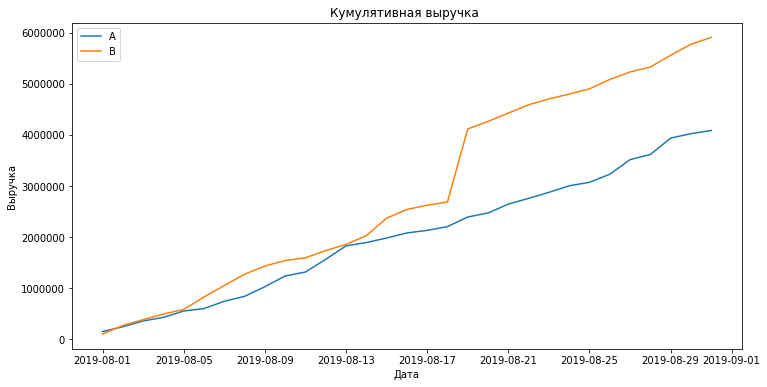

In [20]:
register_matplotlib_converters()
plt.figure(figsize= (12,6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title("Кумулятивная выручка ") 
plt.xlabel("Дата")
plt.ylabel("Выручка") 
plt.legend() 
plt.show()

**Вывод**
Выручка группы В выше граппы А и резко увеличивается в середине эксперимента (в период 17-21 августа). Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке

## График кумулятивного среднего чека 

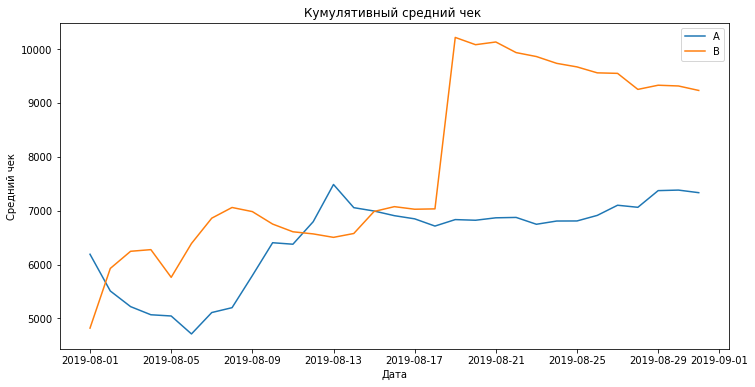

In [21]:
#Построение графика кумулятивного среднего чека
#отношение кумулятивной выручки к кумулятивному числу заказов
plt.figure(figsize= (12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactions'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactions'], label='B')
plt.title("Кумулятивный средний чек ") 
plt.xlabel("Дата")
plt.ylabel("Средний чек") 
plt.legend() 
plt.show()

**Вывод**
В период 17-21 августа (как и с графиком кумулятивная выручки) наблюдается резкий скачек группы В. Вероятно это связано с аномальными значениями вгруппе. В дальнейшем мы наблюдаем снижение данного показателя для той же группы. 

##  График относительного изменения кумулятивного среднего чека

In [22]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',
                                                   right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,transactionsA,revenueB,transactionsB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


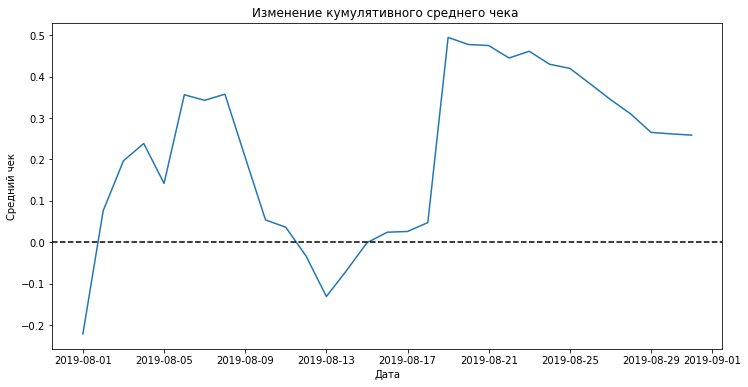

In [23]:
# cтроим отношение средних чеков
plt.figure(figsize= (12,6))
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionsB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA'])-1)

# Добавим горизонтальную ось методом axhline()
plt.axhline(y=0, color='black', linestyle='--') 

plt.title("Изменение кумулятивного среднего чека ") 
plt.xlabel("Дата")
plt.ylabel("Средний чек") 
plt.show()

На графике изменения кумулятивного среднего чека мы наблюдаем резкие скачки. Вероятнее всего это связано с наличием крупных и дорогих заказов в наших группах. 

##  График кумулятивной конверсии по группам

In [24]:
cumulativeData.head()

,date,group,transactions,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [25]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['transactions']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


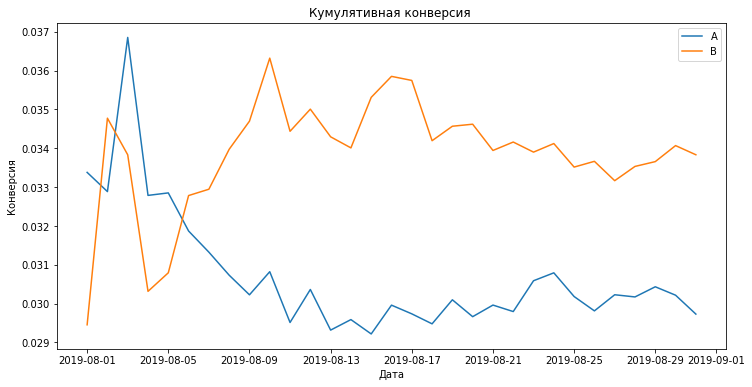

In [26]:
# строим графики
plt.figure(figsize= (12,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title("Кумулятивная конверсия ") 
plt.xlabel("Дата")
plt.ylabel("Конверсия") 
plt.show()


Конверсия группы В выше группы А на протяжение всего эксперимента, начиная с периода приимерно 6 августа

##  График относительного изменения кумулятивной конверсии

In [27]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date',
                                      how='left', suffixes=['A', 'B']))
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


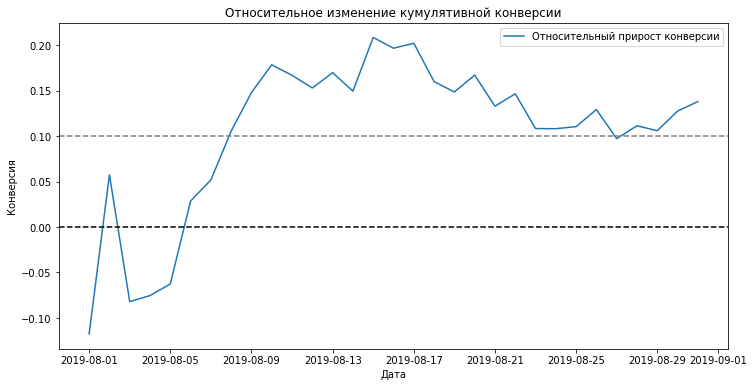

In [28]:
plt.figure(figsize= (12,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']
         /mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии")
plt.legend()
plt.title("Относительное изменение кумулятивной конверсии") 
plt.xlabel("Дата")
plt.ylabel("Конверсия") 
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.show()

Относительное изменение кумулятивной конверсии выше 0 уже после первой недели эксперимента и с середины второй недели находится на уровне выше 10%.

##  Точечный график количества заказов по пользователям

In [29]:
orders.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


In [30]:
#Количество заказов по пользователям
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'transaction']

ordersByUsers.sort_values(by='transaction', ascending=False).head(5)

,visitorId,transaction
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


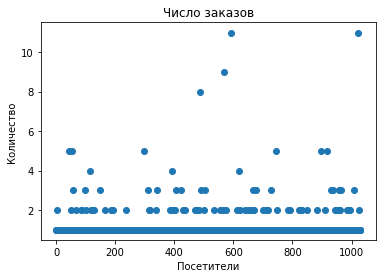

In [31]:
#точечный график количества заказов
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transaction'])

plt.title("Число заказов")
plt.xlabel("Посетители")
plt.ylabel("Количество") 
plt.show()

Большинство пользователей делает не более двух заказов

##  Точечный график стоимостей заказов

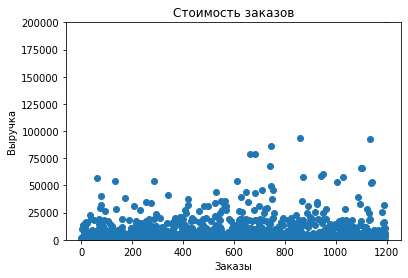

In [65]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.title("Стоимость заказов") 
plt.xlabel("Заказы")
plt.ylabel("Выручка") 
plt.ylim(0, 200000)
plt.show()

In [66]:
orders['revenue'].describe().apply('{0:.5f}'.format)

count    1197.00000   
mean     8348.00585   
std      39191.13177  
min      50.00000     
25%      1220.00000   
50%      2978.00000   
75%      8290.00000   
max      1294500.00000
Name: revenue, dtype: object

Большая часть пользователей совершает покупкин е дороже 20 000 рублей 

##  95-й и 99-й перцентили количества заказов на пользователя

In [34]:
np.percentile(ordersByUsers['transaction'], [ 95, 99])

array([2., 4.])

##  95-й и 99-й перцентили стоимости заказов

In [35]:
np.percentile(orders['revenue'], [ 95, 99])

array([28000. , 58233.2])

## Статистическая значимость различий в конверсии («сырые» данные)

**Нулевая гипотеза (Н0)** - внесение коррективов не изменило конверсию (различие конверсий не является статистически значимым). **Альтернативная гипотеза (Н1)** - внесение коррективов изменило конверсию (разница статистически значима).

Подготовка данных для расчета статичстической значимости. Из данных пока не будем исключать аномальных пользователей.

In [36]:
#считаем кумулятивную сумму визитов группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#считаем кумулятивную сумму визитов группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [37]:
#заказы и выручка по дням для группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,20,148579
1,2019-08-02,19,93822
2,2019-08-03,24,112473
3,2019-08-04,15,70825
4,2019-08-05,25,124218


In [38]:
#считаем кумулятивное количество заказов и выручку группы А
ordersACummulative = (ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]
                                        .agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1)
                      .sort_values(by=['date']))
ordersACummulative.columns = ['date', 'ordersCummulativeA','revenueCummulativeA']
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,20,148579
1,2019-08-02,39,242401
2,2019-08-03,63,354874
3,2019-08-04,78,425699
4,2019-08-05,103,549917


In [39]:
#заказы и выручка по дням для группы B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [40]:
#считаем кумулятивное количество заказов и выручку группы B
ordersBCummulative = (ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                                        .agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1)
                      .sort_values(by=['date']))
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [41]:
# собираем все полученные данные вместе
data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,20,148579,21,101217,20,148579,21,101217,719,713,719,713
1,2019-08-02,19,93822,24,165531,39,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,63,354874,61,380996,507,509,1845,1803
3,2019-08-04,15,70825,17,108571,78,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,103,549917,101,581995,756,707,3318,3280


In [42]:
#пользователи хотя бы с одним заказом

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 
ordersByUsersA.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [43]:
# добавим нули для пользователей, которые ничего не заказывали
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],axis=0) 

In [44]:
# проверка критерием Манна-Уитни
"{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1])

'0.017'

In [45]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(sampleA, sampleB, alternative='two-sided')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.016792355056752608
Отвергаем нулевую гипотезу: разница статистически значима


In [46]:
#относительный прирост конверсии группы B
"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)

'0.138'

Первое число — p-value = 0.017 меньше 0.05. Значит отвергаем, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет. Относительный проигрыш группы А равен 13.8%.
Вывод: По «сырым» данным различия в конверсии групп A и B есть.

## Статистическая значимость различий в среднем чеке («сырые» данные)

**Нулевая гипотеза (Н0)** - внесение коррективов не изменило средний чек (различие средних чеков не является статистически значимым). 
**Альтернативная гипотеза (Н1)** - внесение коррективов изменило средний чек (разница статистически значима).

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.

In [47]:
# проверка критерием Манна-Уитни
'{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], 
                                 alternative='two-sided')[1])

'0.729'

In [48]:
#относительный прирост среднего чека группы B
'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'0.259'

In [49]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], 
                          alternative='two-sided')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


P-value (0.729) значительно больше 0.05. Значит, нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. Впрочем, средний чек группы B значительно выше среднего чека группы A.

## Статистическая значимость различий в конверсии («очищенные» данные)

**Нулевая гипотеза (Н0)** - внесение коррективов не изменило конверсию по "очищенным" данным (различие конверсий не является статистически значимой).  
**Альтернативная гипотеза (Н1)** - внесение коррективов изменило конверсию по "очищенным" данным  (разница статистически значима).

95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4. Примем за аномальных пользователей тех, кто совершил от 3 заказов. Мы уберем менее 5% данных

In [50]:
# пользователей с числом заказов больше 3

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId']],axis=0)

In [51]:
usersWithManyOrders.drop_duplicates().shape

(9,)

У нас 9 пользователей, совершивших более трех покупок

In [52]:
#Расчет конверсии по очищенных данным
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(usersWithManyOrders))]['orders'],
        pd.Series( 0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],
    axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(usersWithManyOrders))]['orders'],
        pd.Series( 0, index=np.arange( data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],
    axis=0)


In [53]:
# критерий Манна-Уитни
'{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1])

'0.016'

In [54]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.015811886405121434
Отвергаем нулевую гипотезу: разница статистически значима


In [55]:
#относительный прирост конверсии группы B (очищенный)
'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'0.147'

p-value практически не изменился и равен 0.016, что  меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный проигрыш группы А увеличился по очищенным данным до 14.7%.
Вывод сохраняем: По «очищенным» данным различий в конверсии групп A и B есть.

## Статистическая значимость различий в среднем чеке («очищенные» данные)

**Нулевая гипотеза (Н0)** - внесение коррективов не изменило средний чек "очищенных" данных (различие средних чеков не является статистически значимым).  
**Альтернативная гипотеза (Н1)** - внесение коррективов изменило средний чек "очищенных" данных  (разница статистически значима).

95-й и 99-й перцентили средних чеков равны 28000 и 58233,2 рублям. Примем за аномальных пользователей тех, кто приобрел довар дороже 30000 руб. Мы уберем менее 5% данных

In [56]:
#пользователей, совершивших заказы дороже 30 000 руб.
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']

In [57]:
usersWithExpensiveOrders.drop_duplicates().shape

(51,)

51 пользователль совершил заказ дороже 30000 руб.

In [58]:
# критерий Манна-Уитни
'{0:.3f}'.format(st.mannwhitneyu
        (orders[np.logical_and(orders['group'] == 'A', 
                               np.logical_not(orders['visitorId'].isin(usersWithExpensiveOrders)))]['revenue'],
        orders[np.logical_and(orders['group'] == 'B', 
                              np.logical_not(orders['visitorId'].isin(usersWithExpensiveOrders)))]
         ['revenue'],
        alternative='two-sided')[1])

'0.882'

In [59]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A', 
                          np.logical_not(orders['visitorId'].isin(usersWithExpensiveOrders)))]['revenue'],
    orders[np.logical_and(orders['group'] == 'B', 
                              np.logical_not(orders['visitorId'].isin(usersWithExpensiveOrders)))]['revenue'],
    alternative='two-sided'
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.881580571005409
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [60]:
#относительный прирост среднего чека группы B (очищенный)
"{0:.3f}".format(
    orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(usersWithExpensiveOrders)))]
    ['revenue'].mean()
    / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(usersWithExpensiveOrders)))]
    ['revenue'].mean()
        - 1)

'-0.016'

P-value очищенный вырос (0.882). Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, все еще нет. А вот после очистки данных от выбросов, средний чек группы B стал значительно ниже среднего чека группы A.

# Результаты теста

По результатам А/В теста:
* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий
* График относительного изменения кумулятивной конверсии между группами сообщает, что результаты группы B лучше группы A и  с середины второй недели находится на уровне выше 10%.

Рекомендуем остановить тест и признать результаты группы В успешными. 


# Вывод

Совместно с отделом маркетинга был подготовлен список гипотез для увеличения выручки.  

По ICE приоритизации гипотез лучше всего были:
* Запустить акцию, дающую скидку на товар в день рождения (16.20 баллов)
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (13.33 баллов)
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (11.20 баллов)

По методу RICE в лидерах были дргуие гипотезы, так как имеют наибольший охват:
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (112.0 баллов)
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (56.0 баллов)

Далее мы проанализировали результаты А/В теста. В нашем распоряжении были данные о 1197 транзакциях. По графикам кумулятивной выручки, среднего чека и конверсии по группам мы наблюдали лучшие показатели в группе В. На графиках были резкие скачки в измеряемых метриках, вероятнее всего это было связано с наличием крупных и дорогих заказов в наших группах. 
Далее мы проанализировали аномальных пользователей, и сделали вывод, что такими пользователями стали клиенты, совершившие заказы дороже 30 000 руб. и более 3 штук, в общей сложности тахих было 51 и 9 клиентов соответственно.

После проведения статистических тестов мы сделали следующие выводы: 
* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий

Также отмечаем, что график относительного изменения кумулятивной конверсии между группами показывает, что результаты группы B лучше группы A и с середины второй недели находится на уровне выше 10%.

На основе этих данных мы рекомендуем остановить тест и признать результаты группы В успешными.
